## PCA
- 차원 축소 기법 중 대표적인 기법
- 고차원에서 저차원으로 축소하는 선영 투영 기법
- 데이터의 차원이 증가할 수록 거리가 증가하고, 오버피팅 가능성이 커짐

### PCA 단계
- 데이터에서 분산이 최대인 축을 찾음 (첫번재 축)
- 첫번째 축과 직교하면서 분산이 최대인 축을 찾음(두번째 축)
- 첫번째와 두번째 축에 직교하고, 분산이 최대인 축을 찾음(세번째 축)

#### 데이터 준비

In [4]:

import pandas as pd
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
print(data.shape)
data.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


#### 스케일링

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [8]:
# 데이터 복사
df = data.copy()

#### PCA

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [15]:
df = pca.fit_transform(df)
print(df.shape)
df[:3]

(178, 2)


array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

#### PCA(2차원) 시각화

In [18]:
import matplotlib.pyplot as plt
df = pd.DataFrame(df)
df.head()

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


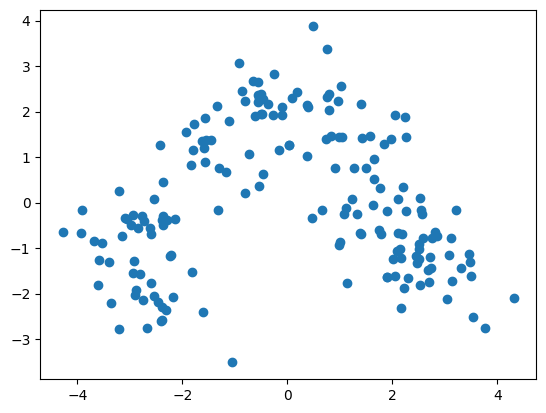

In [19]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])

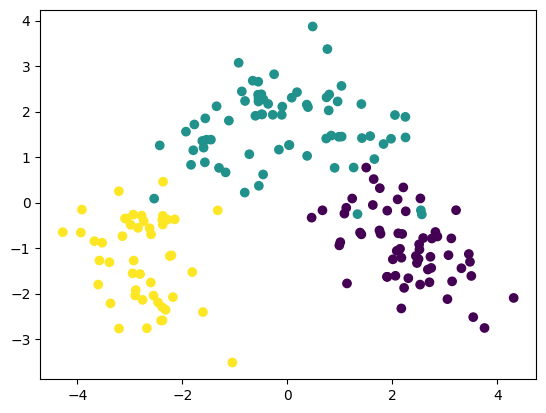

In [21]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target)

In [24]:
# 데이터 설명
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.65333406 0.34666594]
1.0


#### 지도 학습

In [36]:
# PCA후 데이터로 머신러닝 (2)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()
model.fit(df, dataset.target)
scores = cross_val_score(estimator=model, X=df, y=dataset.target, scoring="accuracy", cv=5)
print(scores.mean())
scores

0.9436507936507936


array([0.94444444, 0.94444444, 0.97222222, 0.94285714, 0.91428571])

In [37]:
scores = cross_val_score(estimator=model, X=data, y=dataset.target, scoring="accuracy", cv=5)
print(scores.mean())
scores

0.9665079365079364


array([0.91666667, 0.94444444, 1.        , 0.97142857, 1.        ])

In [40]:
# 3차원 변환
df = data.copy()
pca = PCA(n_components=3)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

,0,1,2
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


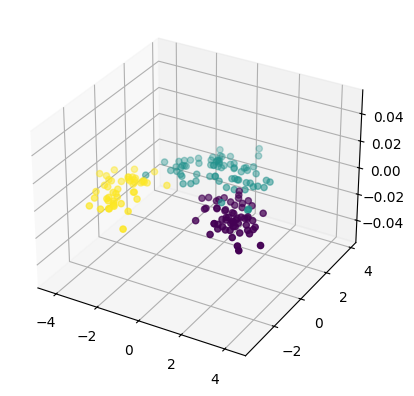

In [43]:
# 시각화
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target)

### 점진적 PCA
- 데이터 셋이 큰 경우 활용 (배치를 통해 점진적 수행)

In [45]:
from sklearn.decomposition import IncrementalPCA

df = data.copy()
pca = IncrementalPCA(n_components=2, batch_size=16)
df = pca.fit_transform(df)

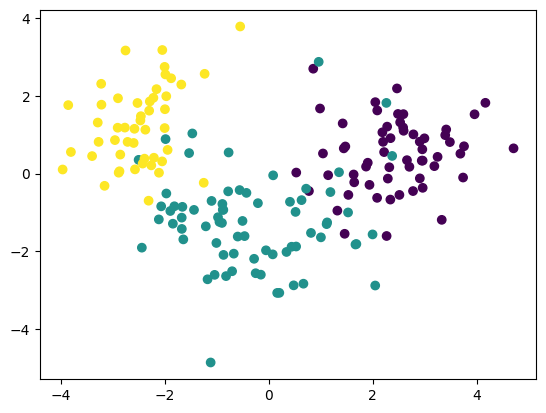

In [46]:
df = pd.DataFrame(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target)

In [48]:
pca.explained_variance_ratio_
pca.explained_variance_ratio_.sum()

0.4924119400154399

### 희소 PCA
- 적절한 희소성을 유지(alpha값으로 조정)
- 오버피팅 방지

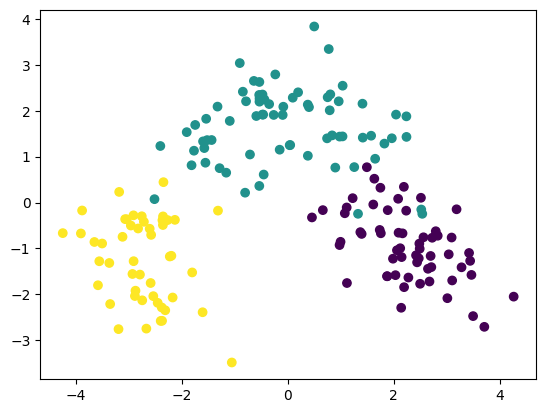

In [51]:
from sklearn.decomposition import SparsePCA

df = data.copy()
pca = SparsePCA(n_components=2, alpha=0.01)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target)


### 커널 PCA
- 비선형으로 차원 축소

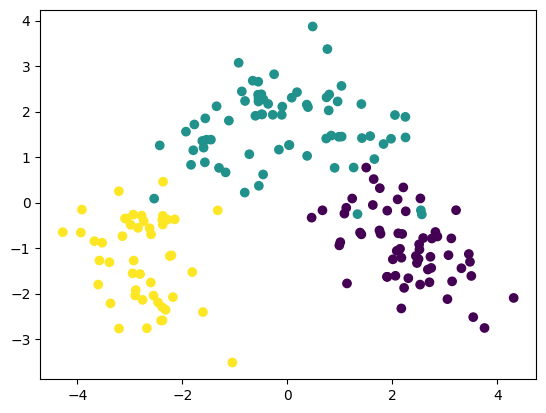

In [52]:
from sklearn.decomposition import KernelPCA

df = data.copy()
pca = KernelPCA(n_components=2, alpha=0.01)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target)


### SVD(Singular Value Decomposition) 특잇값 분해
- 행렬을 특정한 구조로 분해하는 방식
- 신호 처리와 통계학 등의 분야에서 자주 사용됨

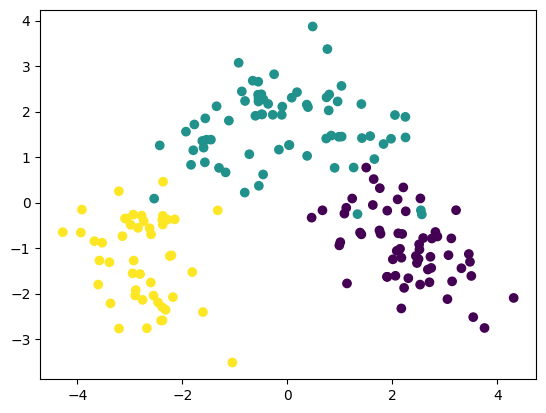

In [53]:
from sklearn.decomposition import TruncatedSVD

df = data.copy()
pca = TruncatedSVD(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target)
